Processed file: cleaned_cleaned_benin-malanville.csv
            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-08-09 00:01:00  0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0     0.4   
1 2021-08-09 00:02:00  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0     0.0   
2 2021-08-09 00:03:00  0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.3     1.1   
3 2021-08-09 00:04:00  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.2     0.7   
4 2021-08-09 00:05:00  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.1     0.7   

   ...  DHI_z_score  DHI_outlier  WS_z_score  WS_outlier  Tamb_z_score  \
0  ...     -0.74614        False   -1.365300       False     -0.328631   
1  ...     -0.74614        False   -1.365300       False     -0.328631   
2  ...     -0.74614        False   -1.167037       False     -0.328631   
3  ...     -0.74614        False   -1.233124       False     -0.328631   
4  ...     -0.74614        False   -1.299212       False     -0.328631   

   Tamb_outlier  TModA_z_score  TModA_o

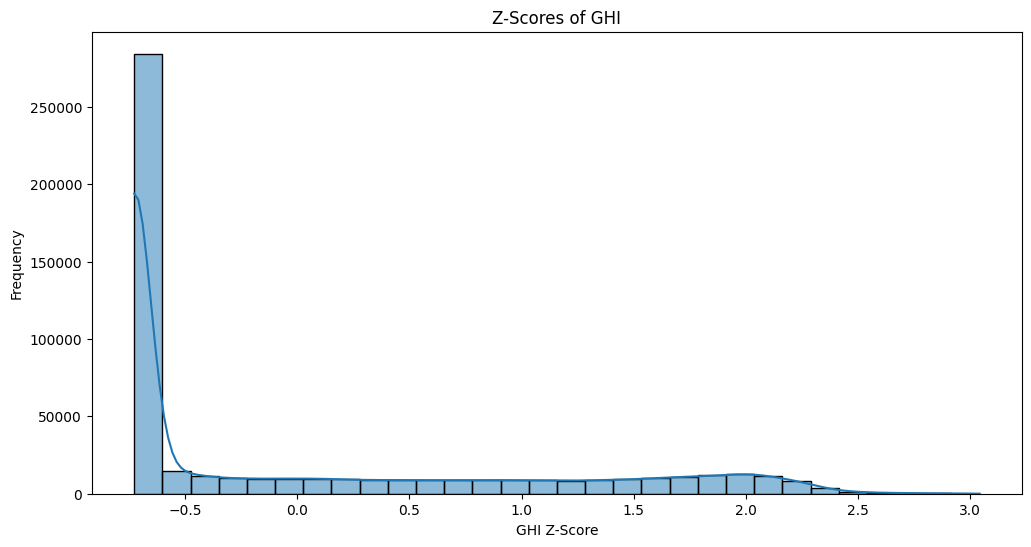

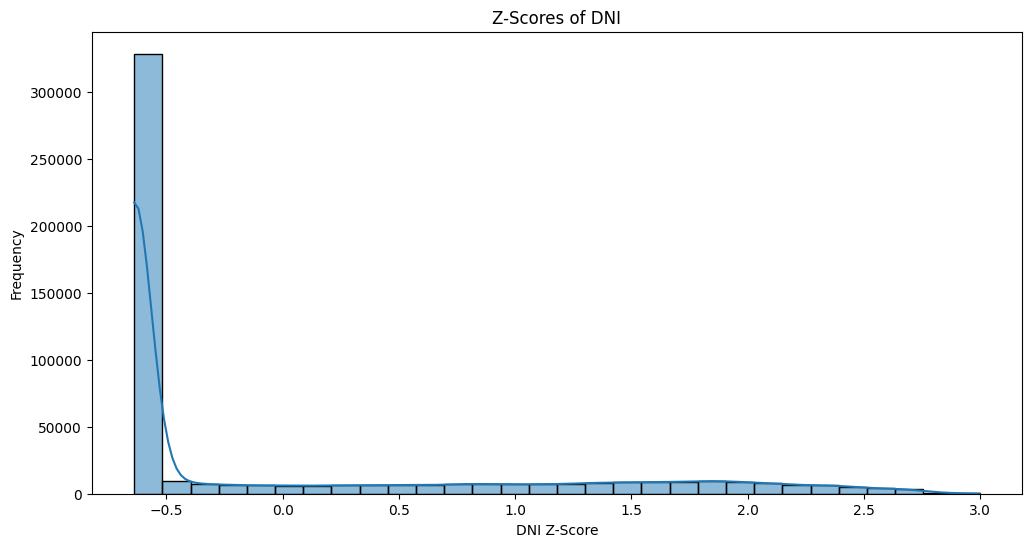

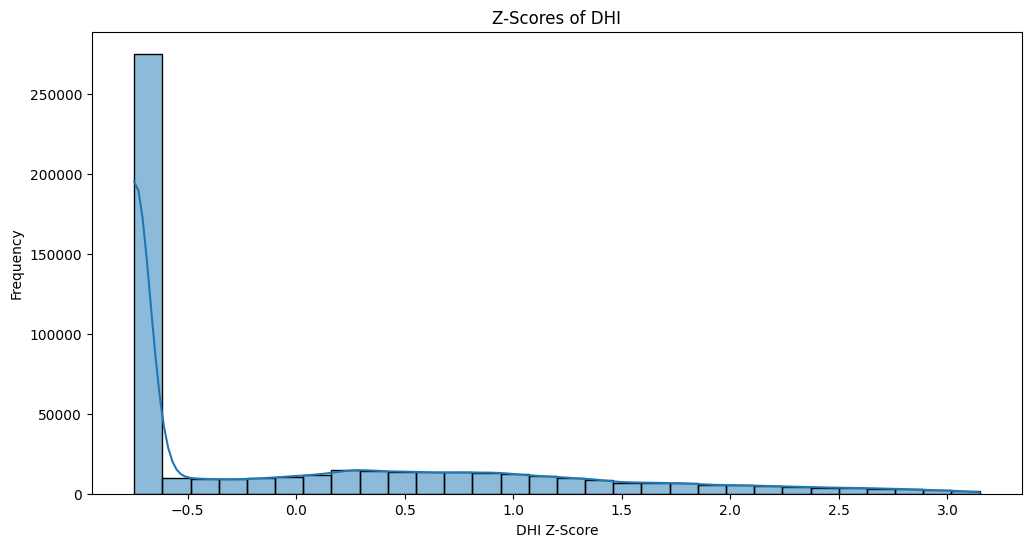

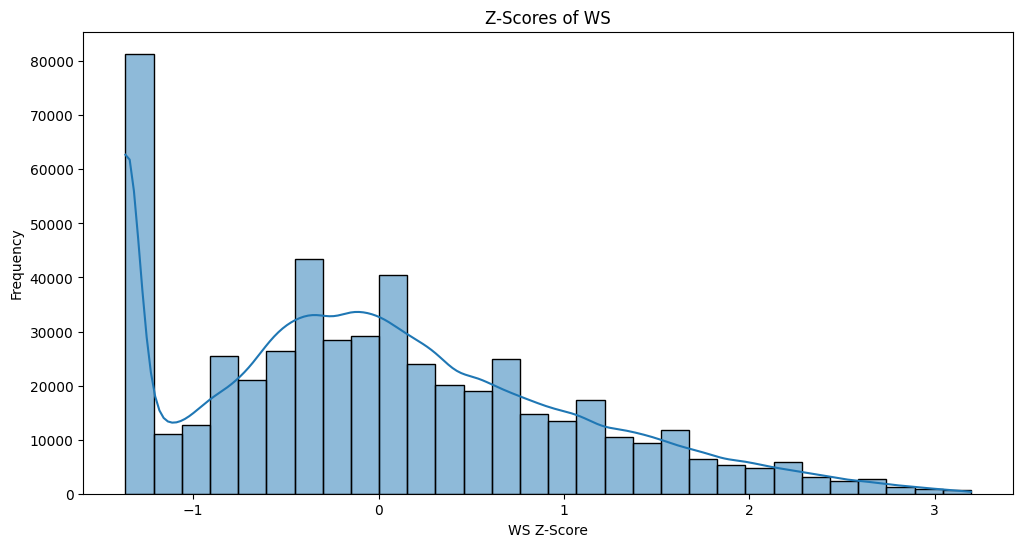

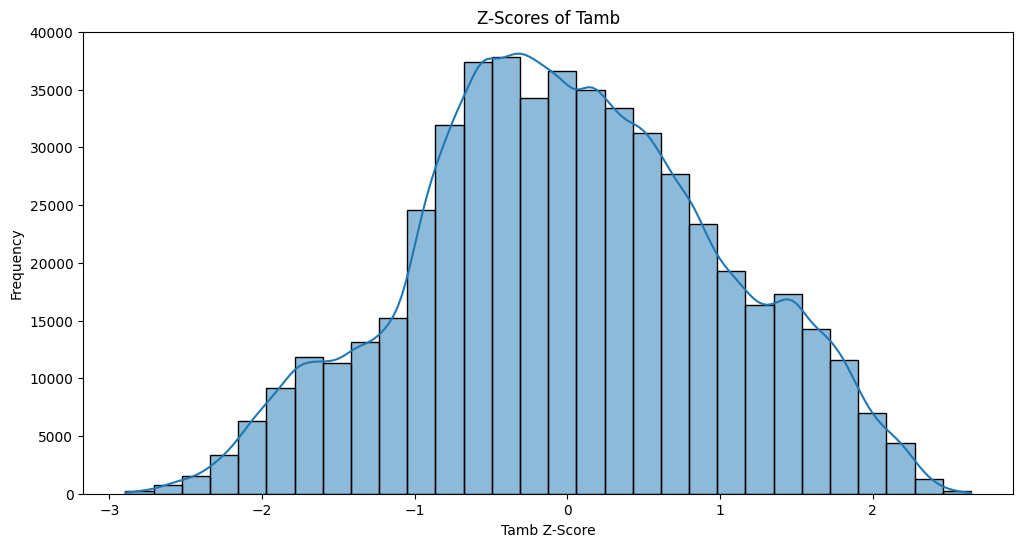

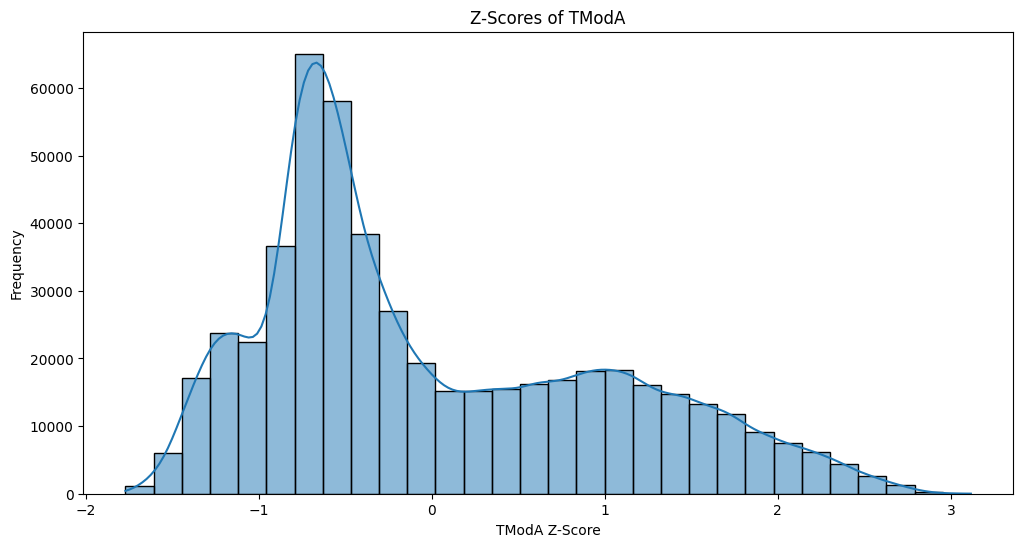

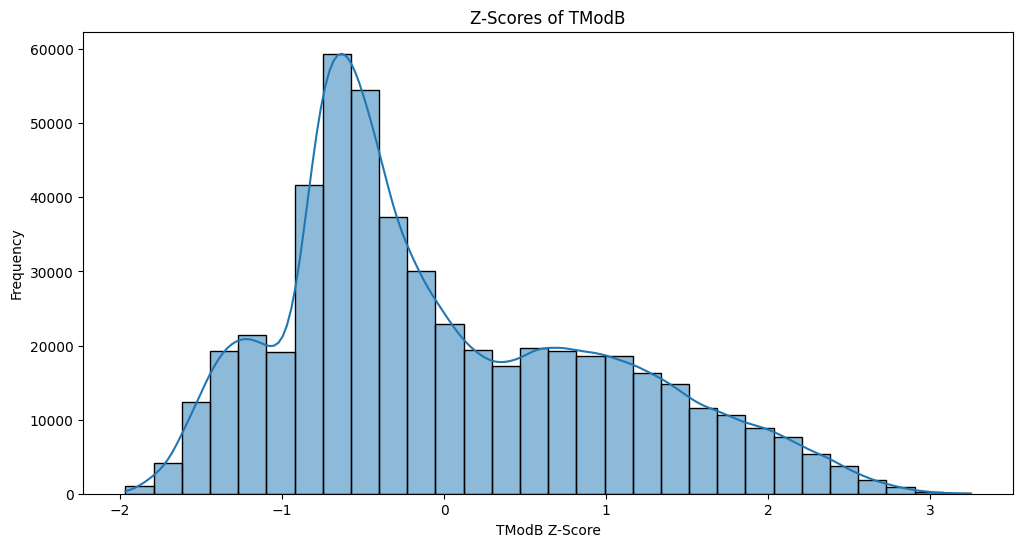

Processed file: cleaned_cleaned_sierraleone-bumbuna.csv
            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-30 00:01:00  0.0  0.0  0.0   0.0   0.0  21.9  99.1  0.0     0.0   
1 2021-10-30 00:02:00  0.0  0.0  0.0   0.0   0.0  21.9  99.2  0.0     0.0   
2 2021-10-30 00:03:00  0.0  0.0  0.0   0.0   0.0  21.9  99.2  0.0     0.0   
3 2021-10-30 00:04:00  0.0  0.0  0.0   0.0   0.0  21.9  99.3  0.0     0.0   
4 2021-10-30 00:05:00  0.0  0.0  0.0   0.0   0.0  21.9  99.3  0.0     0.0   

   ...  DHI_z_score  DHI_outlier  WS_z_score  WS_outlier  Tamb_z_score  \
0  ...    -0.729689        False   -0.943432       False     -0.981122   
1  ...    -0.729689        False   -0.943432       False     -0.981122   
2  ...    -0.729689        False   -0.943432       False     -0.981122   
3  ...    -0.729689        False   -0.943432       False     -0.981122   
4  ...    -0.729689        False   -0.943432       False     -0.981122   

   Tamb_outlier  TModA_z_score  TMod

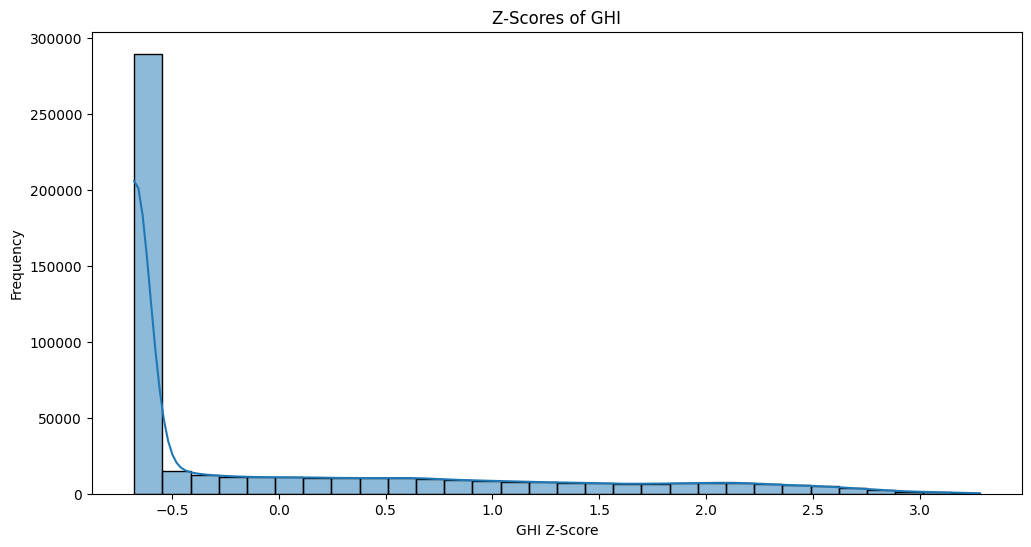

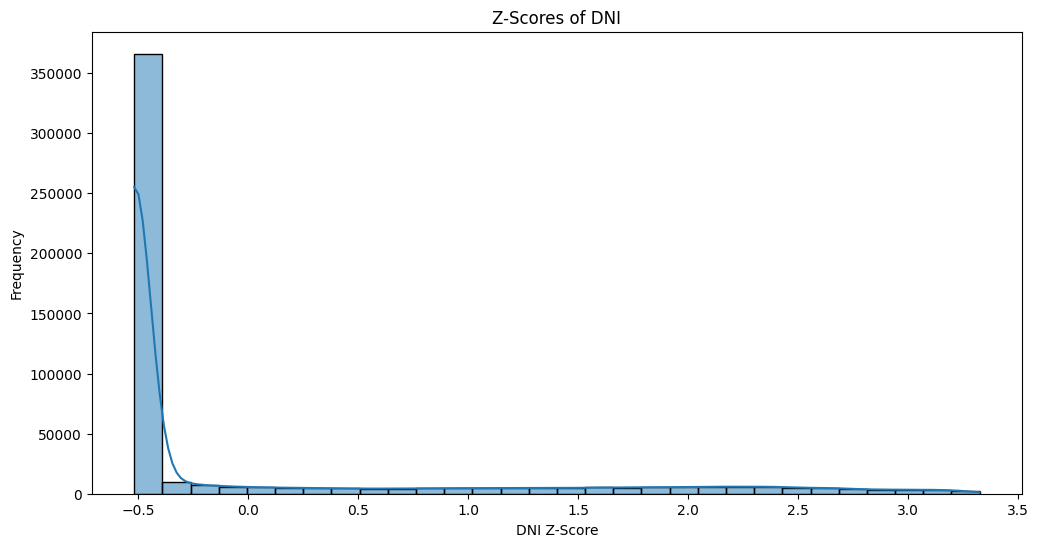

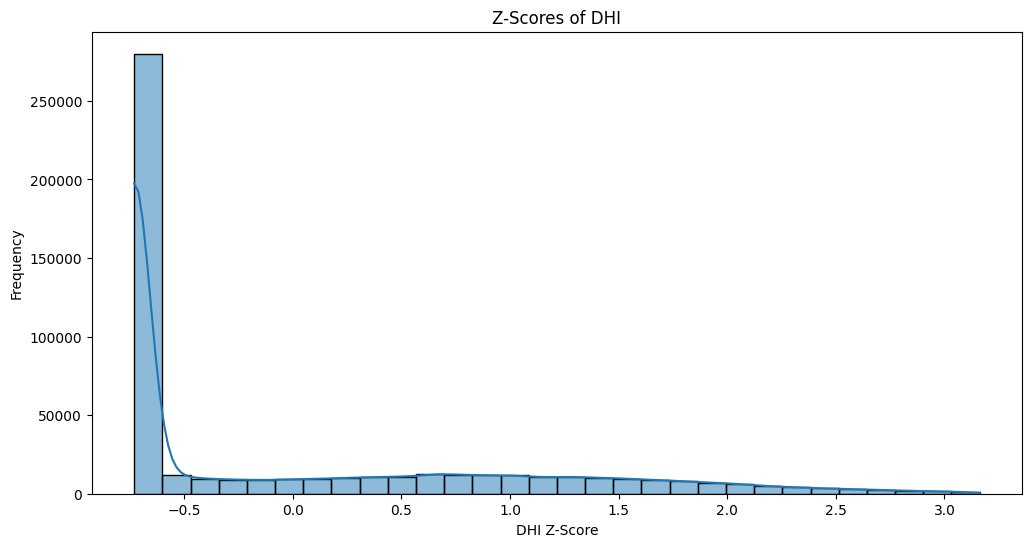

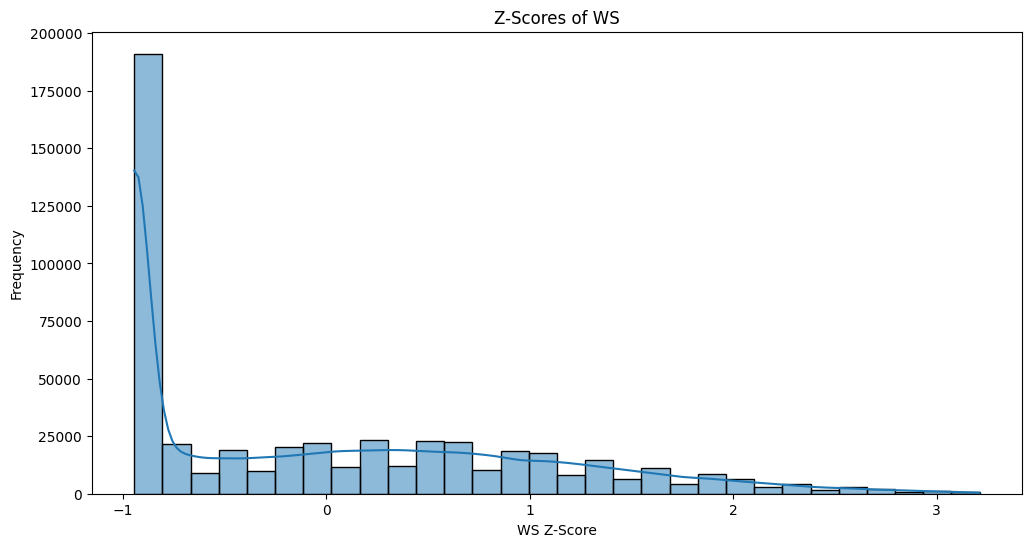

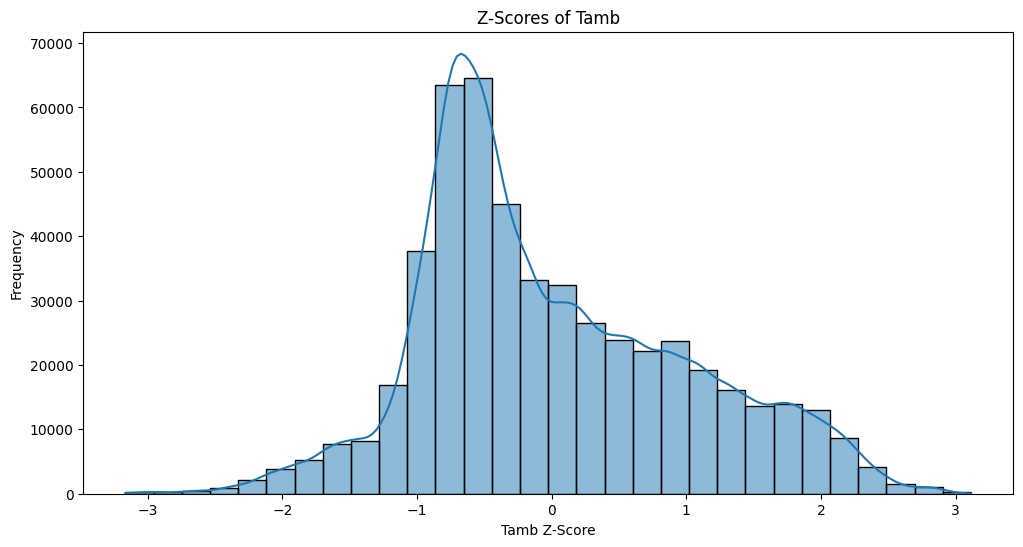

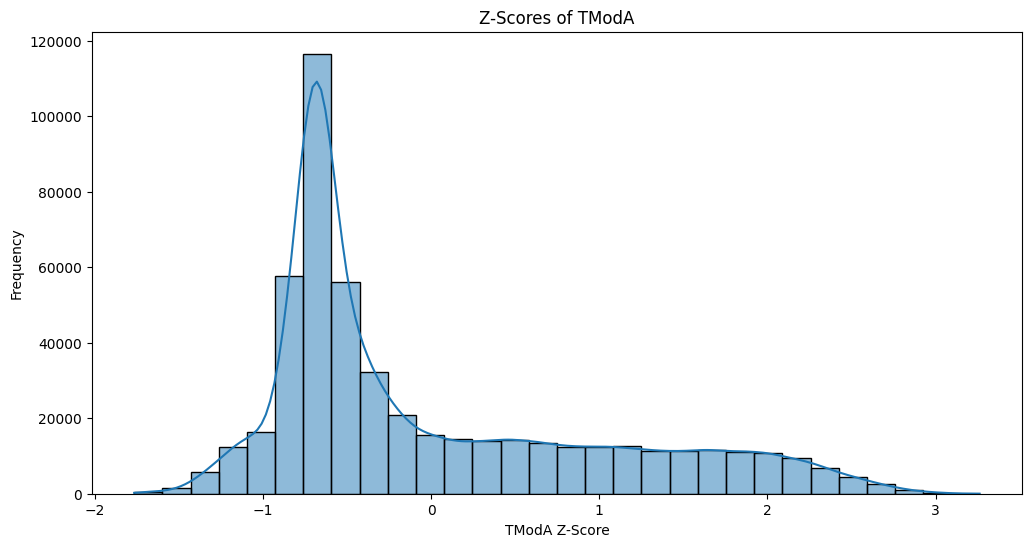

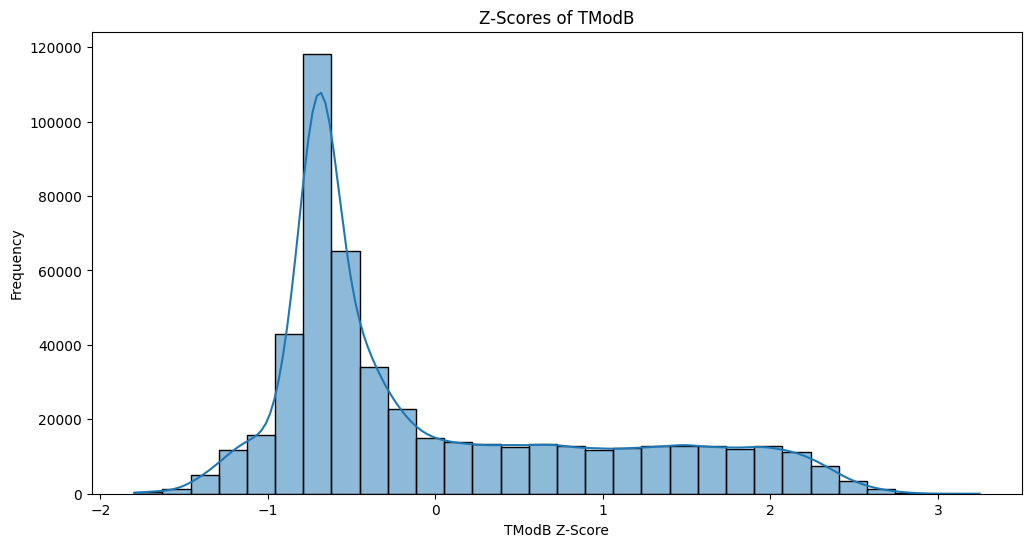

Processed file: cleaned_cleaned_togo-dapaong_qc.csv
            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-25 00:01:00  0.0  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1 2021-10-25 00:02:00  0.0  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2 2021-10-25 00:03:00  0.0  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3 2021-10-25 00:04:00  0.0  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4 2021-10-25 00:05:00  0.0  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   ...  DHI_z_score  DHI_outlier  WS_z_score  WS_outlier  Tamb_z_score  \
0  ...    -0.744078        False   -1.024810       False      -0.61536   
1  ...    -0.744078        False   -0.879672       False      -0.61536   
2  ...    -0.744078        False   -0.807103       False      -0.61536   
3  ...    -0.744078        False   -0.807103       False      -0.61536   
4  ...    -0.744078        False   -0.734534       False      -0.61536   

   Tamb_outlier  TModA_z_score  TModA_ou

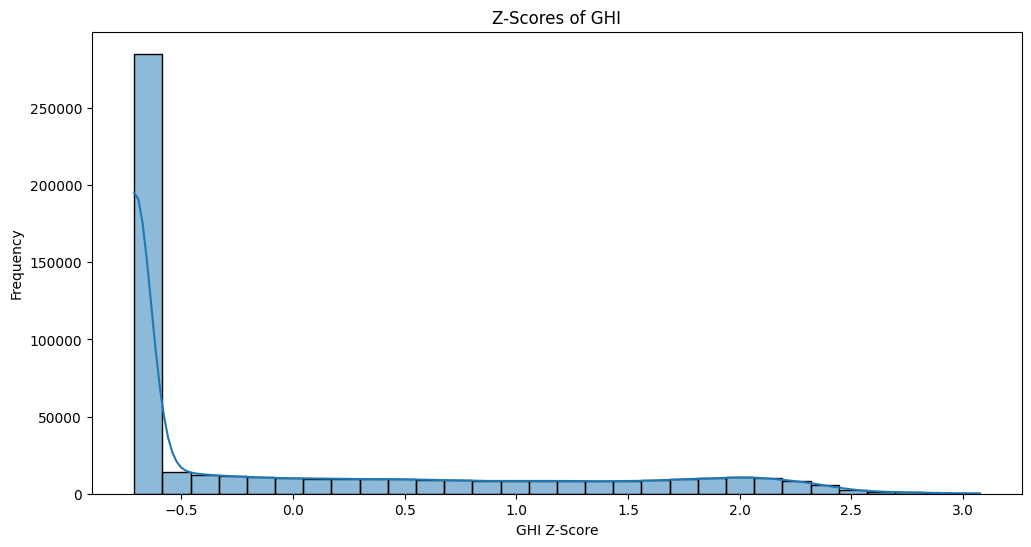

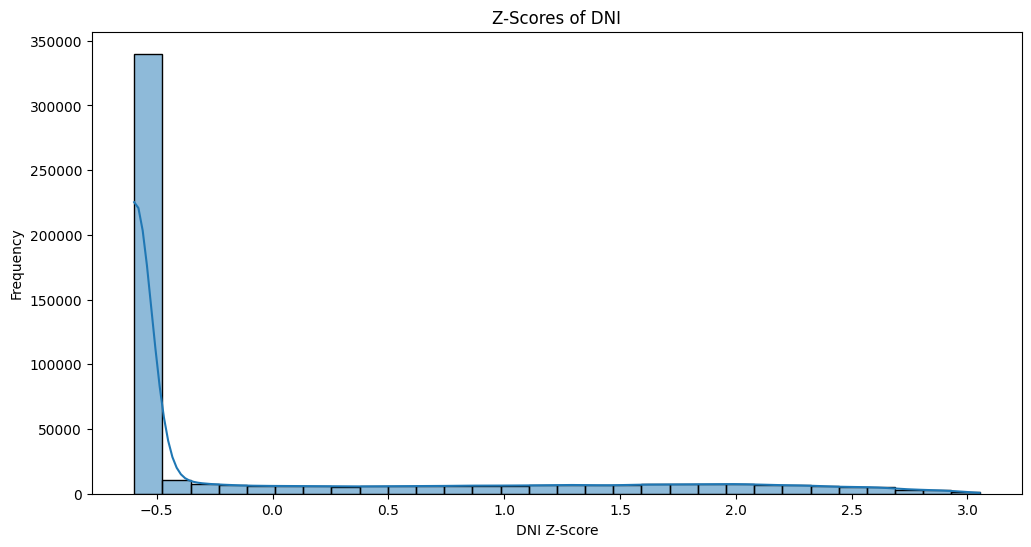

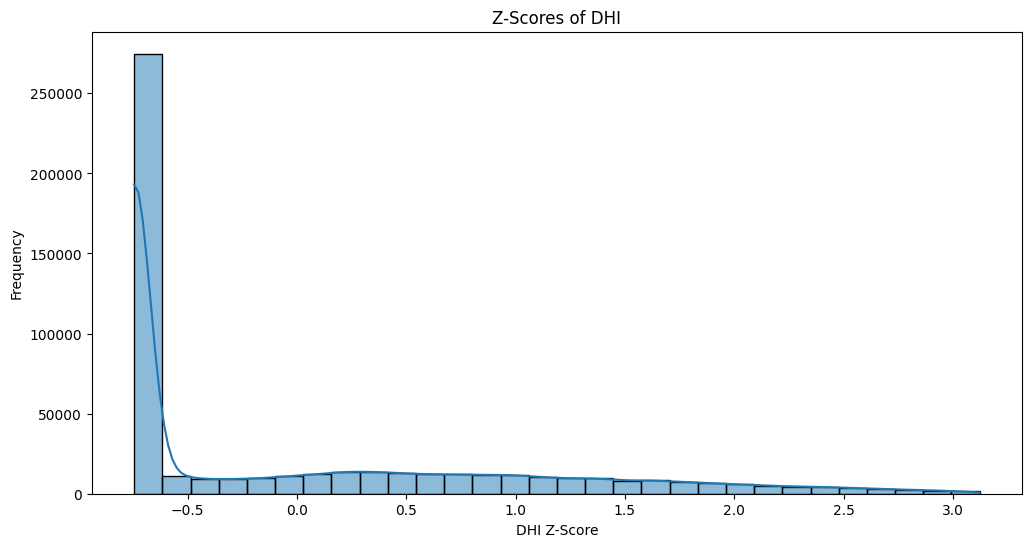

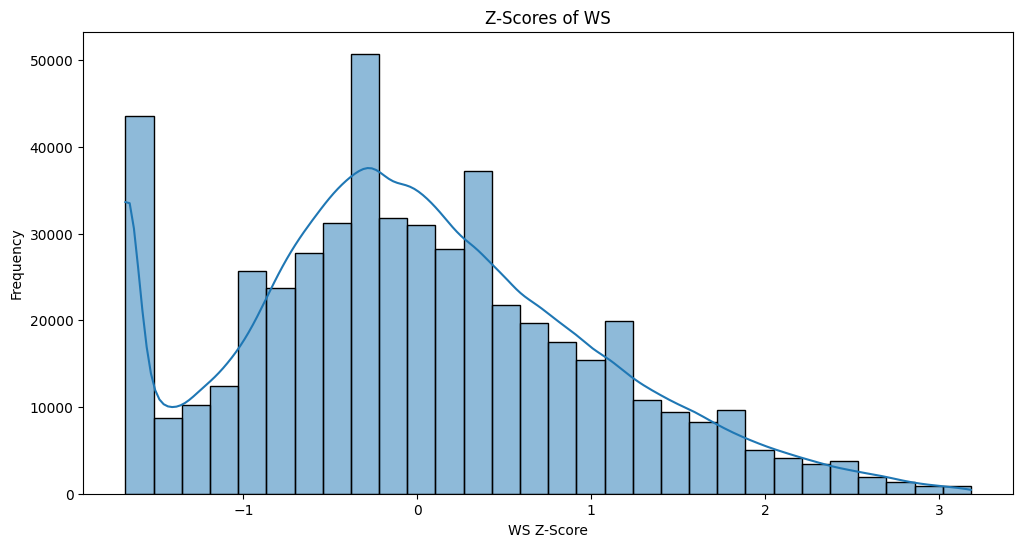

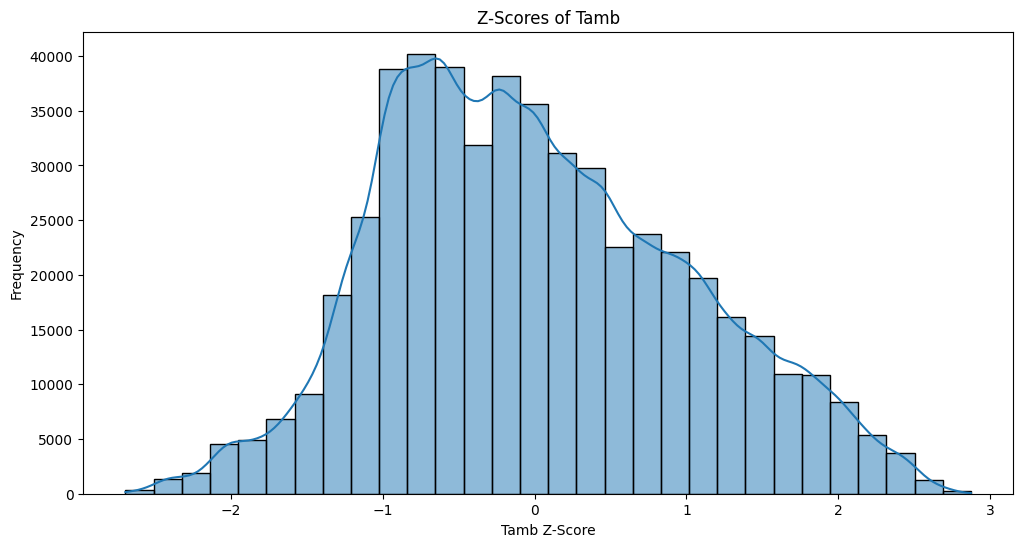

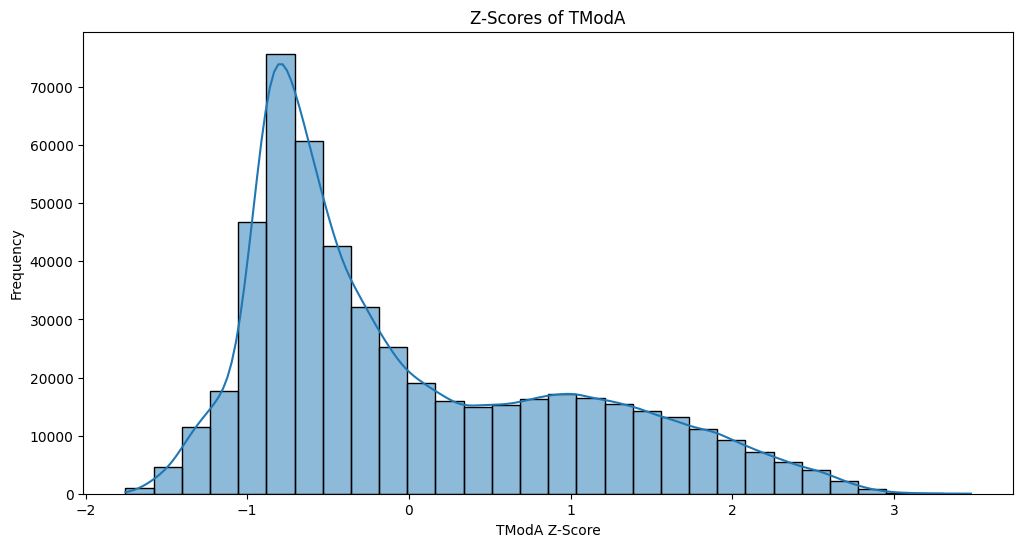

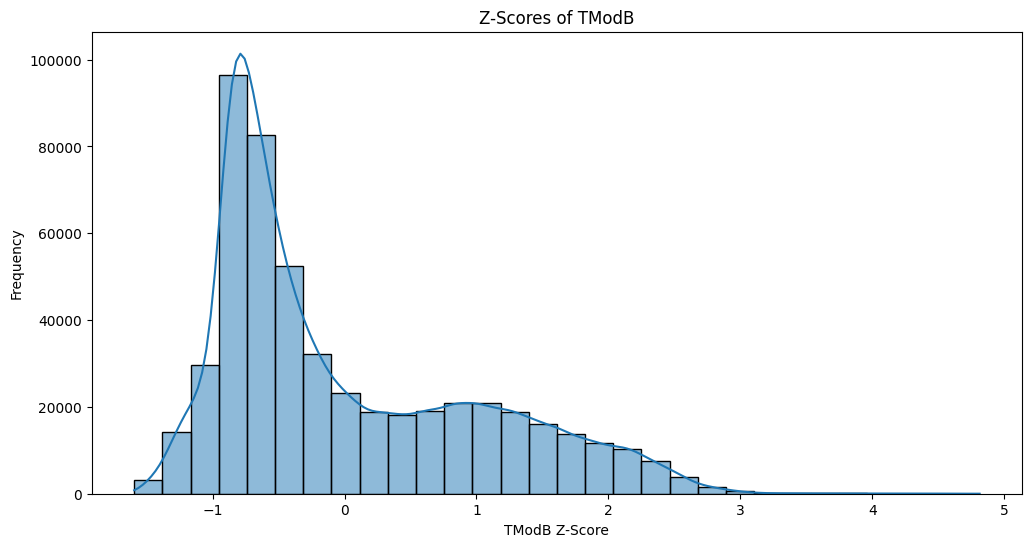

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

class DataFolderProcessor:
    def __init__(self, folder_name='cleaned_data'):
        self.current_directory = os.getcwd()
        self.data_folder_path = os.path.join(self.current_directory, folder_name)
        self.csv_files = [f for f in os.listdir(self.data_folder_path) if f.endswith('.csv')]

    def process_file(self, csv_file):
        file_path = os.path.join(self.data_folder_path, csv_file)
        df = pd.read_csv(file_path)
        return df

# Function to calculate Z-scores and flag outliers
def calculate_z_scores(df, variables):
    z_scores = pd.DataFrame()
    for var in variables:
        z_scores[var] = (df[var] - df[var].mean()) / df[var].std()
        df[f'{var}_z_score'] = z_scores[var]
        df[f'{var}_outlier'] = np.abs(z_scores[var]) > 3  # Flag as outlier if Z-score > 3
    return df

# Example usage
processor = DataFolderProcessor()
csv_files = processor.csv_files

# List of variables to calculate Z-scores for
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']

for csv_file in csv_files:
    df = processor.process_file(csv_file)
    
    # Convert Timestamp to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Calculate Z-scores and flag outliers
    df = calculate_z_scores(df, variables)
    
    # Display the first few rows of the DataFrame with Z-scores and outliers
    print(f'Processed file: {csv_file}')
    print(df.head())

    # Plotting Z-scores for visualization
    for var in variables:
        plt.figure(figsize=(12, 6))
        sns.histplot(df[f'{var}_z_score'], kde=True, bins=30)
        plt.title(f'Z-Scores of {var}')
        plt.xlabel(f'{var} Z-Score')
        plt.ylabel('Frequency')
        plt.show()
